In [1]:
import numpy as np # lib for array operation
import matplotlib.pyplot as plt # disply images/ plots

# Our image processing tools
# image processing operation lib
from skimage.filters import try_all_threshold, rank # import multiple functions from certain class
from skimage.morphology import disk # generat the disk mask
from skimage import data, color # data: include defult images; color: color convert functions

In [82]:
# gray image
coins_image = data.coins()
coins_image.shape

(303, 384)

Text(0.5, 1.0, 'coins')

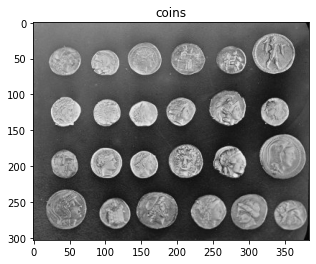

In [17]:
plt.imshow(coins_image, cmap = 'gray')
plt.title('coins')
#plt.axis('off')

In [13]:
# RBG
coffee_image = data.coffee()
coffee_image.shape

(400, 600, 3)

Text(0.5, 1.0, 'coffee')

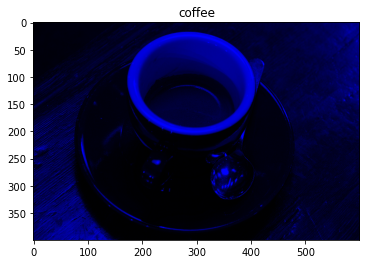

In [87]:
plt.imshow([0, 0, 1] * coffee_image, )
plt.title('coffee')
#plt.axis('off')

In [88]:
# convert RGB to gray: Compute luminance of an RGB image
# Y = 0.2125 R + 0.7154 G + 0.0721 B
coffee_gray = color.rgb2gray(coffee_image)

Text(0.5, 1.0, 'coffee gray')

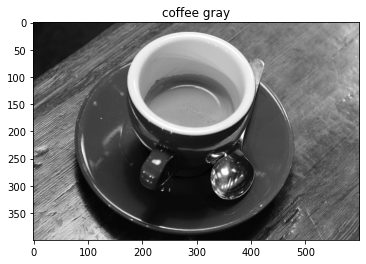

In [89]:
plt.imshow(coffee_gray, cmap='gray' )
plt.title('coffee gray')

In [91]:
# image is an array (matrix)
coffee_gray

array([[0.05623333, 0.05651608, 0.04978902, ..., 0.73961804, 0.75166549,
        0.74579451],
       [0.05595059, 0.05651608, 0.05792275, ..., 0.73905255, 0.75081725,
        0.74297412],
       [0.05875608, 0.05846549, 0.05848824, ..., 0.73905255, 0.74494627,
        0.74886784],
       ...,
       [0.52715216, 0.64400353, 0.58801529, ..., 0.38923373, 0.37580941,
        0.31533412],
       [0.61655255, 0.59387137, 0.58352824, ..., 0.34640118, 0.31699294,
        0.31195529],
       [0.58801529, 0.57484392, 0.5757    , ..., 0.34721176, 0.30803373,
        0.29569569]])

Text(0.5, 1.0, 'coffee gray vertically flip')

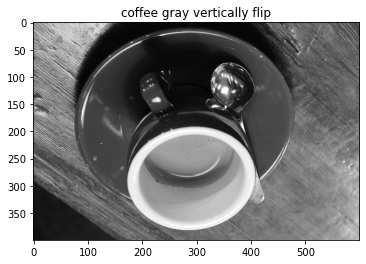

In [92]:
# Flip the image vertically
coffee_vf = np.flipud(coffee_gray)

plt.imshow(coffee_vf, cmap='gray' )
plt.title('coffee gray vertically flip')

Text(0.5, 1.0, 'coffee gray horizontally flip')

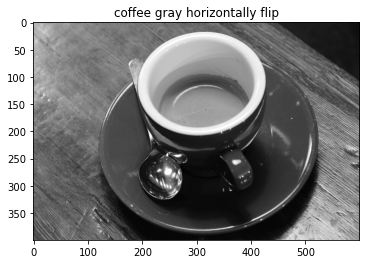

In [93]:
# Flip the image horizontally
coffee_hf = np.fliplr(coffee_gray)
plt.imshow(coffee_hf, cmap='gray' )
plt.title('coffee gray horizontally flip')

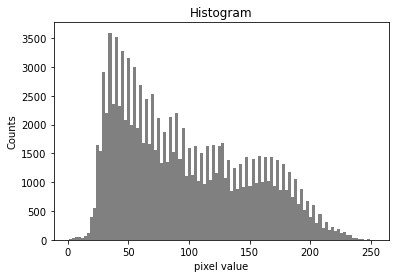

In [98]:
# plot histgram of image
plt.hist(coins_image.ravel(), bins=100, color='gray');
plt.xlabel('pixel value')
plt.ylabel('Counts')
plt.title('Histogram'); # Set title

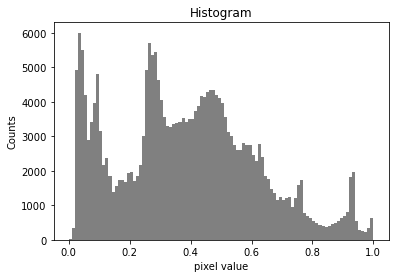

In [97]:
plt.hist(coffee_gray.ravel(), bins=100, color='gray');
# Set title
plt.xlabel('pixel value')
plt.ylabel('Counts')
plt.title('Histogram');

In [109]:
coffee_binary = coffee_gray > 0.9
print(coffee_binary.shape)
bi_mask = np.repeat(np.expand_dims(coffee_binary, 2), 3, axis = 2)
print(bi_mask.shape)

(400, 600)
(400, 600, 3)


Text(0.5, 1.0, 'Binarized image')

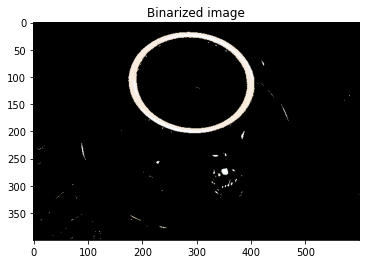

In [110]:
# Show the resulting binary image
plt.imshow(bi_mask*coffee_image, cmap='gray')
plt.title('Binarized image')

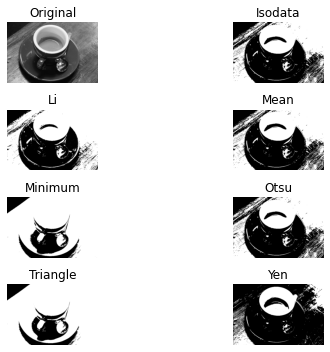

In [111]:
# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(coffee_gray, verbose=False);

In [2]:
# apply filter on image
image = data.coins() # load coin image
footprint = disk(5) #np.ones((5,5)) # generate kernel for filtering: disk shape/square using 0/1

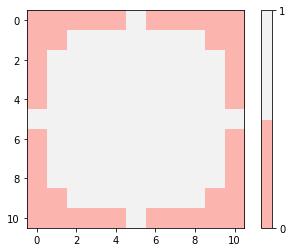

In [11]:
# display kernel shape
cmap = plt.get_cmap('Pastel1', 2) 
plt.imshow(footprint, cmap = cmap)
plt.colorbar(ticks=np.linspace(0,1,2)) 

In [15]:
# apply different filters on image
mean_result = rank.mean(image, footprint = footprint)
median_result = rank.median(image, footprint = footprint)
max_result = rank.maximum(image, footprint = footprint)

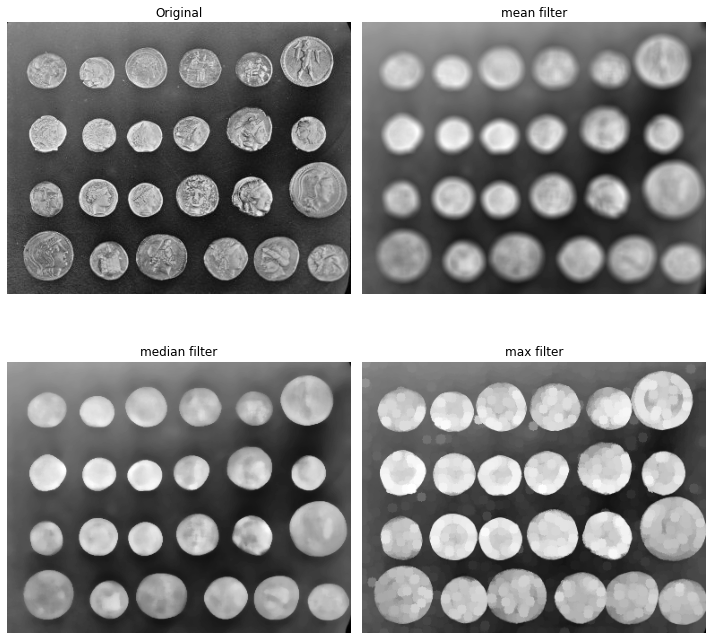

In [18]:
# create figure with subplots (2*2), figure size is 10*10; subplots share x and y axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
# the output axes will be shape [2,2], for easier calling, flatten it via ravel()
ax = axes.ravel()
# define titles of each subplot
titles = ['Original', 'mean filter', 'median filter', 'max filter']
# set images to display in each subplot
imgs = [image, mean_result, median_result, max_result]
# use for loop to display 
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray) # display nth image in imags at nth subplot
    ax[n].set_title(titles[n]) # set its title
    ax[n].axis('off') # turn off the axis

plt.tight_layout() # use tighen layout
